In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
correlations = df.corr()

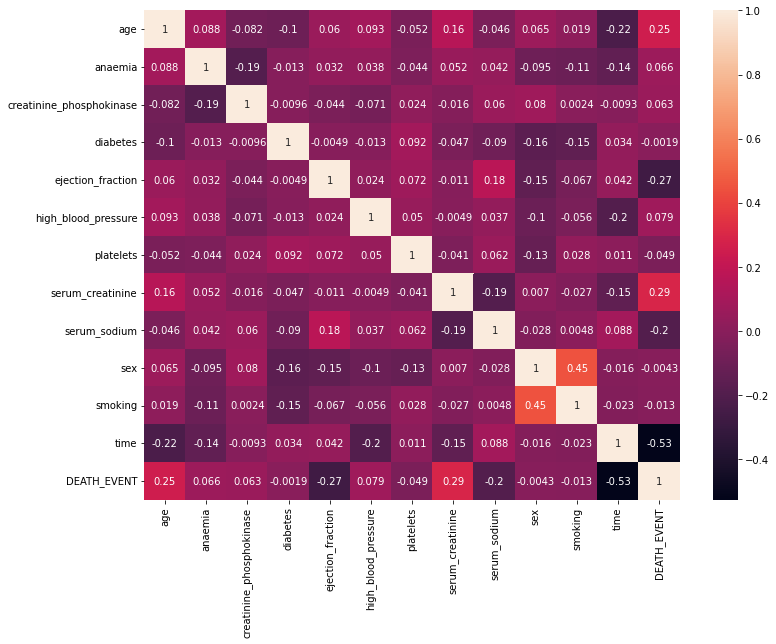

In [7]:
fig = plt.figure(figsize=(12, 9))
sns.heatmap(correlations,annot=True)
plt.show()

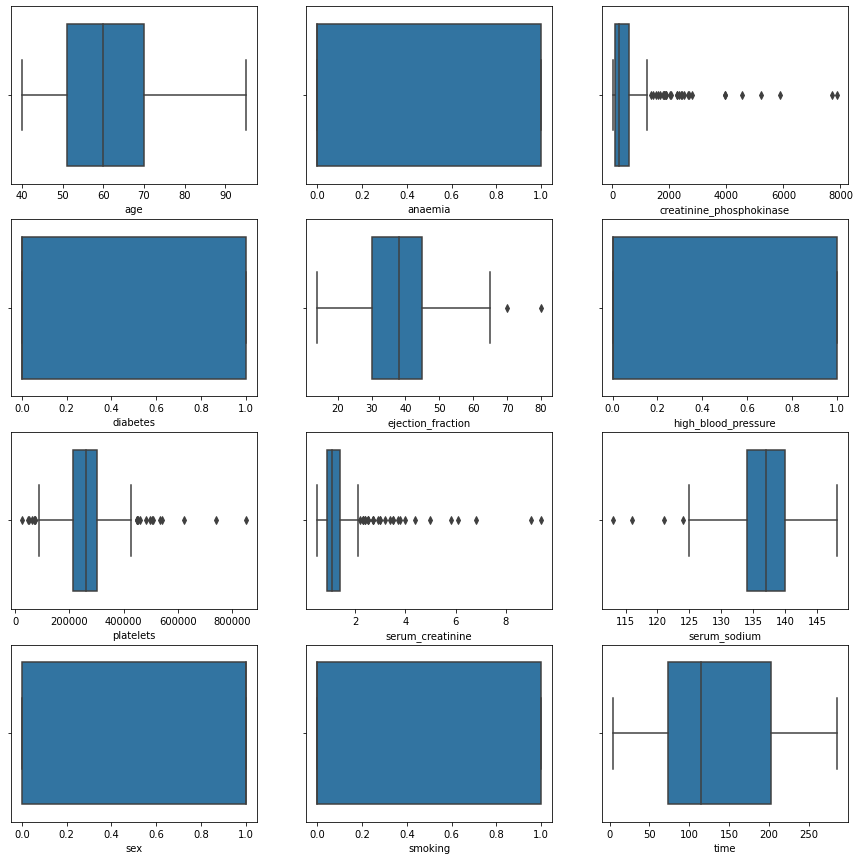

In [8]:
feature = df.drop('DEATH_EVENT',axis=1)
plt.figure(figsize=(15,15))
for i in enumerate(feature.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(feature[i[1]])

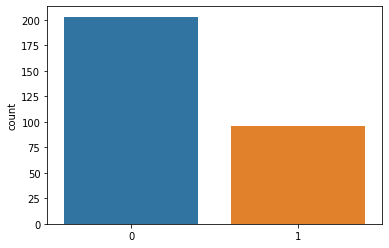

In [9]:
sns.countplot(x = df.DEATH_EVENT.values, data=df)

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
df_new = df[['age','anaemia', 'creatinine_phosphokinase','high_blood_pressure','serum_sodium','DEATH_EVENT']]

In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
x = df.iloc[:,0:11].values
y = df.iloc[:,-1].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [15]:
print(x_train.shape)
print(y_train.shape)

(239, 11)
(239,)


In [16]:
print(x_test.shape)
print(y_test.shape)

(60, 11)
(60,)


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
lr_model = LogisticRegression()

In [19]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predicted = lr_model.predict(x_test)

In [21]:
print (accuracy_score(y_test,predicted))

0.7666666666666667


In [22]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        42
           1       0.67      0.44      0.53        18

    accuracy                           0.77        60
   macro avg       0.73      0.67      0.69        60
weighted avg       0.75      0.77      0.75        60



# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
predicted_clf = clf.predict(x_test)

In [27]:
print (accuracy_score(y_test,predicted_clf))

0.6333333333333333


In [28]:
print (classification_report(y_test,predicted_clf))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        42
           1       0.41      0.50      0.45        18

    accuracy                           0.63        60
   macro avg       0.59      0.60      0.59        60
weighted avg       0.66      0.63      0.64        60



# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_clf = RandomForestClassifier()

In [31]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predicted_rf_clf = rf_clf.predict(x_test)

In [33]:
print (accuracy_score(y_test,predicted_rf_clf))

0.7333333333333333


In [34]:
print (classification_report(y_test,predicted_rf_clf))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.56      0.56      0.56        18

    accuracy                           0.73        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.73      0.73      0.73        60



# SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svc_clf = SVC()

In [37]:
svc_clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
predicted_svc_clf = svc_clf.predict(x_test)

In [39]:
print (accuracy_score(y_test,predicted_svc_clf))

0.7


In [40]:
print (classification_report(y_test,predicted_svc_clf))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        42
           1       0.00      0.00      0.00        18

    accuracy                           0.70        60
   macro avg       0.35      0.50      0.41        60
weighted avg       0.49      0.70      0.58        60



# XGBoost

In [41]:
import xgboost as xgb

In [42]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [43]:
parameters = {
    'eta': 0.3,  
    'silent': True,  # option for logging
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3,  # number of classes to predic
    'max_depth': 3  # depth of the trees in the boosting process
    }  

In [44]:
num_round = 20

In [45]:
bst = xgb.train(parameters, dtrain, num_round)

In [46]:
preds = bst.predict(dtest)

In [47]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [48]:
print (accuracy_score(y_test,best_preds))

0.7166666666666667


In [49]:
print (classification_report(y_test,best_preds))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.53      0.56      0.54        18

    accuracy                           0.72        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.72      0.72      0.72        60



# Feed forward NN

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import Dataset,DataLoader

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [57]:
class Dataset(Dataset):
    def __init__(self, file):
        self.data = pd.read_csv(file)
        input_features = self.data.values[:,0:11].astype('float32')
        self.x_train = torch.from_numpy(input_features)
        
        target_label = self.data['DEATH_EVENT'].values
        self.y_train = torch.from_numpy(target_label)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return (self.x_train[idx],self.y_train[idx])

In [58]:
dataset = Dataset('/content/heart_failure_clinical_records_dataset.csv')
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [63]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer3 = nn.Linear(50, 2)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [64]:
input_dim = x.shape[1]
model = Model(input_dim).to(device)

In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [66]:
epochs = 20

for epoch in range(1,epochs+1):
    print("EPOCH:",epoch,end=" ")
    running_loss=0
    running_acc=0
    
    for data,labels in dataloader:
        data,labels=data.to(device),labels.to(device)
        optimizer.zero_grad()
        output=model.forward(data)
        loss=criterion(output,labels)
        
        result=torch.argmax(output,dim=1)
        running_loss+=loss.item()
        running_acc+=torch.mean((result==labels).type(torch.float))
        
        loss.backward()
        optimizer.step()
    else:
        train_loss=running_loss/len(dataloader)
        train_acc=running_acc/len(dataloader)
        
        print("Training Loss: {:.3f}".format(train_loss),end=" ") 
       
        print("Train Accuracy: {:.2f}%".format(train_acc.item()*100))
        

EPOCH: 1 Training Loss: 0.632 Train Accuracy: 68.12%
EPOCH: 2 Training Loss: 0.632 Train Accuracy: 68.12%
EPOCH: 3 Training Loss: 0.634 Train Accuracy: 67.97%
EPOCH: 4 Training Loss: 0.637 Train Accuracy: 67.67%
EPOCH: 5 Training Loss: 0.641 Train Accuracy: 67.22%
EPOCH: 6 Training Loss: 0.632 Train Accuracy: 68.12%
EPOCH: 7 Training Loss: 0.637 Train Accuracy: 67.67%
EPOCH: 8 Training Loss: 0.635 Train Accuracy: 67.82%
EPOCH: 9 Training Loss: 0.634 Train Accuracy: 67.97%
EPOCH: 10 Training Loss: 0.637 Train Accuracy: 67.67%
EPOCH: 11 Training Loss: 0.634 Train Accuracy: 67.97%
EPOCH: 12 Training Loss: 0.634 Train Accuracy: 67.97%
EPOCH: 13 Training Loss: 0.631 Train Accuracy: 68.27%
EPOCH: 14 Training Loss: 0.634 Train Accuracy: 67.97%
EPOCH: 15 Training Loss: 0.637 Train Accuracy: 67.67%
EPOCH: 16 Training Loss: 0.634 Train Accuracy: 67.97%
EPOCH: 17 Training Loss: 0.638 Train Accuracy: 67.52%
EPOCH: 18 Training Loss: 0.637 Train Accuracy: 67.67%
EPOCH: 19 Training Loss: 0.634 Train 